In [100]:
import glob 
import pandas as pd
import numpy as np
import pprint
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

In [31]:
list_of_datasets = glob.glob('lloyd_et_al/*.csv')
list_of_datasets = sorted(list_of_datasets, key=lambda x: int(x.split('\\')[1].split('_')[0][1:]))

In [32]:
list_of_datasets.pop(2)
list_of_datasets.pop(2)
list_of_datasets.pop(2)

'lloyd_et_al\\d5_jena.csv'

In [33]:
list_of_datasets=list_of_datasets[:-3]

<IPython.core.display.Javascript object>


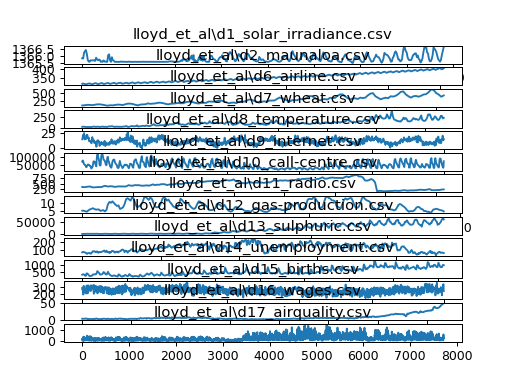

C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value 

lloyd_et_al\d1_solar_irradiance.csv
lloyd_et_al\d2_maunaloa.csv
lloyd_et_al\d6_airline.csv
lloyd_et_al\d7_wheat.csv
lloyd_et_al\d8_temperature.csv
lloyd_et_al\d9_internet.csv


C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value 

lloyd_et_al\d10_call-centre.csv
lloyd_et_al\d11_radio.csv
lloyd_et_al\d12_gas-production.csv
lloyd_et_al\d13_sulphuric.csv
lloyd_et_al\d14_unemployment.csv
lloyd_et_al\d15_births.csv


C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


lloyd_et_al\d16_wages.csv
lloyd_et_al\d17_airquality.csv
{'d10_call-centre': {'length': 180,
                     'max': 872.0,
                     'mean': 492.5,
                     'min': 161.0,
                     'std': 189.53664464900837},
 'd11_radio': {'length': 240,
               'max': 13.5,
               'mean': 8.07833333333333,
               'min': 4.3,
               'std': 2.441283129705837},
 'd12_gas-production': {'length': 476,
                        'max': 66600.0,
                        'mean': 21415.27100840336,
                        'min': 1646.0,
                        'std': 18678.33773005454},
 'd13_sulphuric': {'length': 462,
                   'max': 228.0,
                   'mean': 131.34199134199133,
                   'min': 42.0,
                   'std': 41.263398280734776},
 'd14_unemployment': {'length': 408,
                      'max': 1350.0,
                      'mean': 520.281862745098,
                      'min': 122.0,
             

C:\Users\ge59sek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [117]:
%matplotlib notebook 
stats = {}
fig, axs = plt.subplots(nrows=14, ncols=1)
i =0
for dataset in list_of_datasets:
    name = dataset.split('\\')[1][:-4]
    stats[name] = {}
    dataframe = pd.read_csv(dataset).dropna()
    if 'solar' in dataset:
        y = 'cycle'
    elif 'mauna' in dataset:
        y = 'Carbon Dioxide (ppm)'
    elif 'airquality' in dataset:
        y = 'COx'
    else:
        y = 'y'
    try:
        stats[name]['length'] = int(dataframe[y].shape[0])
        stats[name]['mean'] = dataframe[y].mean()
        stats[name]['std'] = dataframe[y].std()
        # stats[name]['var'] = dataframe[y].var()
        stats[name]['min'] = dataframe[y].min()
        stats[name]['max'] = dataframe[y].max()
        adf = adfuller(dataframe[y])
        kpss_res = kpss(dataframe[y], nlags='auto')
        #stats[name]['adf_nonstationary'] = adf[0] < adf[4]['5%']
        #stats[name]['kpss_nonstationary'] = kpss_res[0] > kpss_res[3]['5%']
        print(dataset)
        dataframe[y].plot(ax=axs[i])
        axs[i].set_title(dataset)
        i+=1
    except Exception as exc:
        print(exc)
pprint.PrettyPrinter(depth=4).pprint(stats)

In [121]:
df = pd.DataFrame(stats).transpose()
df['length'] = df['length'].astype(int)

In [122]:
df.to_csv('Stats_RealWorldData.csv', float_format='%.3f')

In [123]:
df

,length,mean,std,min,max
d1_solar_irradiance,391,1365.815983,0.244184,1365.516500,1366.682900
d2_maunaloa,702,352.298333,26.180379,313.210000,407.650000
d6_airline,144,280.298611,119.966317,104.000000,622.000000
d7_wheat,370,107.876486,67.208055,11.000000,381.000000
d8_temperature,1000,11.206300,4.144073,-0.800000,26.300000
d9_internet,1000,46355.450259,22058.929761,13486.742153,125058.789944
d10_call-centre,180,492.500000,189.536645,161.000000,872.000000
d11_radio,240,8.078333,2.441283,4.300000,13.500000
d12_gas-production,476,21415.271008,18678.337730,1646.000000,66600.000000
d13_sulphuric,462,131.341991,41.263398,42.000000,228.000000
